# CASE STUDY: FASHION CLASS CLASSIFICATION 

## STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
* 0 => T-shirt/top
* 1 => Trouser
* 2 => Pullover
* 3 => Dress
* 4 => Coat
* 5 => Sandal
* 6 => Shirt
* 7 => Sneaker
* 8 => Bag
* 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

## STEP #2: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [3]:
fashion_train_df = pd.read_csv('data/fashion-mnist_train.csv', sep = ',')

In [4]:
fashion_test_df = pd.read_csv('data/fashion-mnist_test.csv', sep= ',')

## STEP #3: VISUALIZATION OF THE DATASET

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')

In [11]:
testing = np.array(fashion_test_df, dtype = 'float32')

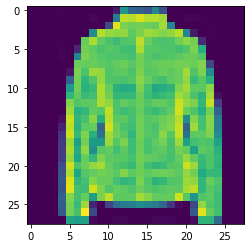

In [17]:
plt.imshow(training[25, 1:].reshape(28, 28))

6.0

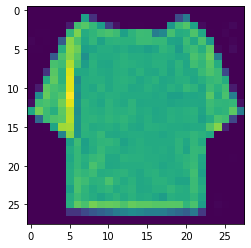

In [22]:
# generate a randox img index for training_data
i = random.randint(1,60000)

#showing training data
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label


# This are the label classes:
# 0 => 'T-shirt/top'
# 1 => 'Trouser'
# 2 => 'Pullover'
# 3 => 'Dress'
# 4 => 'Coat'
# 5 => 'Sandal'
# 6 => 'Shirt'
# 7 => 'Sneaker'
# 8 =>  'Bag'
# 9 => 'Ankle boot'


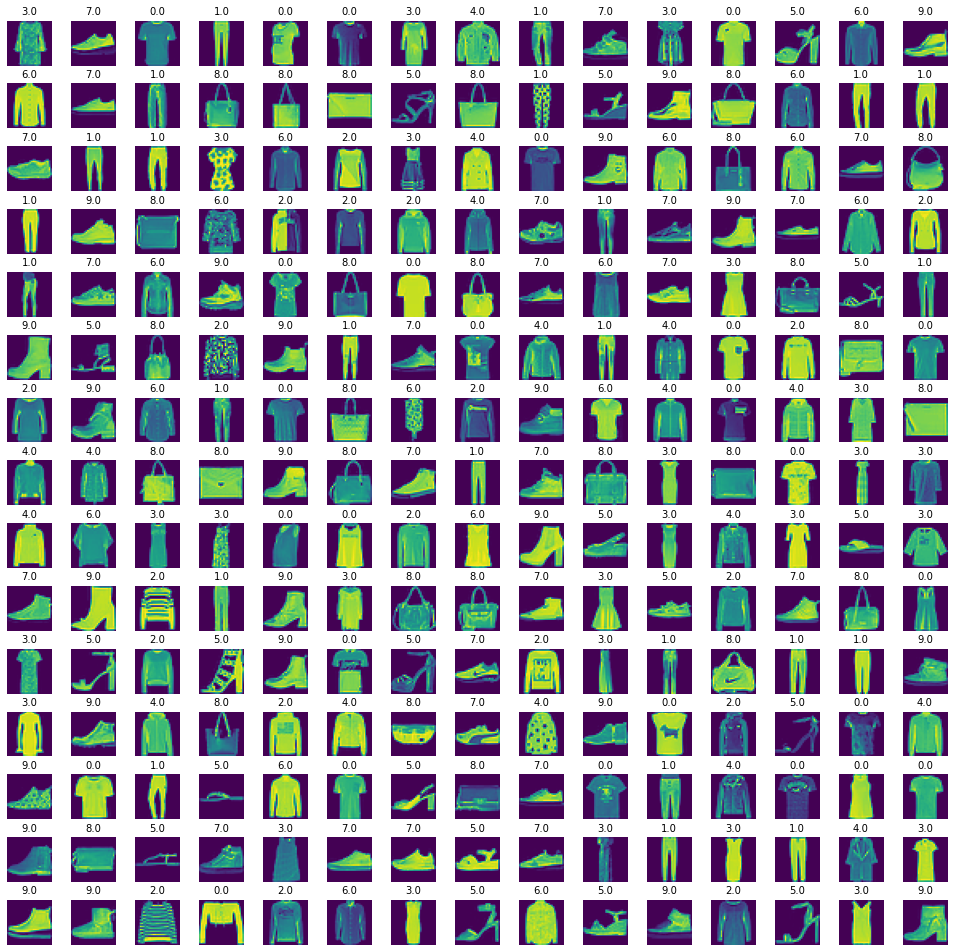

In [23]:
# lets visualize a set of images in order to have a better image of the problem
# define the demensions of the plot grid
W_grid = 15
L_grid = 15

# fig, size = plt.subplots(L_grid,w_grid)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flatten the 15 x 15 matrix into 255 array

n_training = len(training) # get the length of the training dataset

# Select a random numbet from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    
    # select random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape(28,28), cmap='viridis')
    axes[i].set_title(training[index,0], fontsize = 10)
    axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.4)